In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
import gzip

In [2]:
def complocalX(t,p,i):
    score = 0
    for j in range(len(p)):
        if(t[i+j] == p[j]):
            score += 1
        else:
            break
    return score

def scorerX(text,pattern):
    #zero padding first
    text = text + "{0}".format(len(pattern)*" ")
    matcharr = []
    for i in range(len(text)-len(pattern)):
        matcharr.append(complocalX(text,pattern,i))
    
    return np.array(matcharr)

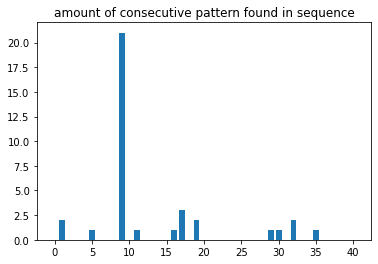

In [3]:
text = "TAGGTATGGAGATCGGAAGAGCGTCGTGTAATAGCACTGTC"
pattern = "AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT"

score = scorerX(text,pattern)
plt.bar(range(len(score)),score)
#plt.ylim([0,1])
plt.title("amount of consecutive pattern found in sequence")
plt.show()

In [ ]:
adapter = "AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT"
sequences = []

with gzip.open("fastq/25_r2.umi.fastq.gz", "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        score = scorerX(str(record.seq),adapter)
        #print("{0:.2f}".format(np.max(score)),"\t", np.argmax(score))
        new = record.seq[:np.argmax(score)]
        if(len(new[:-12])>15):
            #print(new[:-12])
            phred = record.letter_annotations['phred_quality']
            record.letter_annotations = {}
            record.seq = new[:-12]
            record.letter_annotations = {'phred_quality': phred[:len(new[:-12])]}
            sequences.append(record)

SeqIO.write(sequences, "25_r2_final_v2.fastq", "fastq")

# take umi of opp read, rev complement it and search for it in the record, if present, trim

In [2]:
sequences = []
with gzip.open("fastq/25_r1.umi.fastq.gz", "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        rtwoumi = str(Seq(record.name.split("_")[1][-10:]).reverse_complement())
        z = re.search("(.*)({0})".format(rtwoumi[:5]),str(record.seq))
        #if not z:
        #    z = re.search("(.*)({0})".format(rtwoumi[:5]),str(record.seq))
        try:
            if len(z.group(1))>15:
                phred = record.letter_annotations['phred_quality']
                record.letter_annotations = {}
                record.seq = Seq(z.group(1))
                record.letter_annotations = {'phred_quality': phred[:len(z.group(1))]}
                sequences.append(record)
        except AttributeError:
            if(len(record.seq)>14):
                sequences.append(record)
            else:
                continue

In [3]:
SeqIO.write(sequences, "25_r1_final.fastq", "fastq")

7859251

# input libs

In [ ]:
sequences = []
with gzip.open("fastq/24_r1.penult.fastq.gz", "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        rtwoumi = str(Seq(record.name.split("_")[1]).reverse_complement())
        score = scorerX(str(record.seq, rtwoumi)
        new = record.seq[:np.argmax(score)]
        if(len(new)>14):
            phred = record.letter_annotations['phred_quality']
            record.letter_annotations = {}
            record.seq = new
            record.letter_annotations = {'phred_quality': phred[:len(new)]}
            sequences.append(record)

SeqIO.write(sequences, "24_r1_final.fastq", "fastq")

In [ ]:
sequences = []
with gzip.open("fastq/24_r1.umi.fastq.gz", "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        rtwoumi = str(Seq(record.name.split("_")[1]).reverse_complement())
        z = re.search("(.*)({0})".format(rtwoumi[:5]),str(record.seq))
        try:
            if len(z.group(1))>15:
                phred = record.letter_annotations['phred_quality']
                record.letter_annotations = {}
                record.seq = Seq(z.group(1))
                record.letter_annotations = {'phred_quality': phred[:len(z.group(1))]}
                sequences.append(record)
        except AttributeError:
            if(len(record.seq)>14):
                sequences.append(record)
            else:
                continue